# Import main libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Spaceship Titanic

The dataset is from the Kaggle getting starting prediction competition [paceship titanic](https://www.kaggle.com/competitions/spaceship-titanic/overview).
> ersonal records for about two-thirds (~8700) of the passengers, to be used as training data.

    PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
    HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
    CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
    Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
    Destination - The planet the passenger will be debarking to.
    Age - The age of the passenger.
    VIP - Whether the passenger has paid for special VIP service during the voyage.
    RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
    Name - The first and last names of the passenger.
    Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [8]:
url="data/train.csv"
df = pd.read_csv(url)
df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

## Statistic type of variables

* PassengerId: Categorical/nominal
* HomePlanet: Categorical/nominal
* CryoSleep: categorical/boolean
* Cabin: categorical/nominal
* Destination: categorical/nominal
* Age: numerical/discrete
* VIP: categrical/boolean
* RoomService: numerical/discrete
* FoodCourt: numerical/discrete
* ShoppingMall: numerical/discrete
* Spa: numerical/discrete
* VRDeck: numerical/discrete
* Name: Categorical/nominal
* Transported: categorical/boolean

In [9]:
df[['deck', 'num_cabin', 'side']] = df.Cabin.str.split('/', expand=True)
df

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0             0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1           109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2            43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3             0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4           303.0       70.0         151.0   565.0     2.0  Willy Santantines   
...           ...        ...           ...     ...     ...                ...   
8688          0.0     6819.0           0.0  1643.0    74.0  Gravior Noxnuther   
8689          0.0        0.0           0.0     0.0     0.0    Kurta Mondalley   
8690          0.0        0.0        1872.0     1.0     0.0       Fayey Connon   
8691          0.0     1049.0           0.0   353.0  3235.0   Celeon Hontichre   
8692        126.0     4688.0           0.0     0.0    12.0   Propsh Hontichre   

      Transported deck num_cabin side  
0           False    B         0    P  
1            True    F         0    S  
2           False    A         0    S  
3           False    A         0    S  
4            True    F         1    S  
...           ...  ...       ...  ...  
8688        False    A        98    P  
8689        False    G      1499    S  
8690         True    G      1500    S  
8691        False    E       608    S  
8692         True    E       608    S  

[8693 rows x 17 columns]

In [10]:

# My function to get general info about the dataframe
def my_info(df: pd.DataFrame) -> pd.DataFrame:
    dict_info = {
        'n_unique': df.nunique(),
        'n_missing': df.isna().sum(),
        'non_null_count': df.count(),
        '%_of_null/total_lignes': (df.isna().sum() / df.shape[0]) * 100,
        'dtype': df.dtypes
    }
    return pd.DataFrame(dict_info)

display(my_info(df))

n_unique  n_missing  non_null_count  %_of_null/total_lignes  \
PassengerId       8693          0            8693                0.000000   
HomePlanet           3        201            8492                2.312205   
CryoSleep            2        217            8476                2.496261   
Cabin             6560        199            8494                2.289198   
Destination          3        182            8511                2.093639   
Age                 80        179            8514                2.059128   
VIP                  2        203            8490                2.335212   
RoomService       1273        181            8512                2.082135   
FoodCourt         1507        183            8510                2.105142   
ShoppingMall      1115        208            8485                2.392730   
Spa               1327        183            8510                2.105142   
VRDeck            1306        188            8505                2.162660   
Name              8473        200            8493                2.300702   
Transported          2          0            8693                0.000000   
deck                 8        199            8494                2.289198   
num_cabin         1817        199            8494                2.289198   
side                 2        199            8494                2.289198   

                dtype  
PassengerId    object  
HomePlanet     object  
CryoSleep      object  
Cabin          object  
Destination    object  
Age           float64  
VIP            object  
RoomService   float64  
FoodCourt     float64  
ShoppingMall  float64  
Spa           float64  
VRDeck        float64  
Name           object  
Transported      bool  
deck           object  
num_cabin      object  
side           object

In [11]:
# Drop the name and ID columns, because it should be irrelevant for the EDA and the model creation

df.drop(columns=['Name', 'PassengerId'], inplace=True)

In [12]:
df.columns

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'deck', 'num_cabin', 'side'],
      dtype='object')

In [13]:
# Categorical features
cat_cols = df.select_dtypes(include=['object', 'bool']).columns

# Numerical features
num_cols = df.select_dtypes(include='number').columns

print('Categorical features: ', cat_cols)
print('Numerical features: ', num_cols)


Categorical features:  Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Transported',
       'deck', 'num_cabin', 'side'],
      dtype='object')
Numerical features:  Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')


# Univariate Statistic to check distributions of random variables

## Categorical features

In [145]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=cat_cols.shape[0], cols=1, subplot_titles=cat_cols)

for i, col in enumerate(cat_cols):
    fig.add_trace(go.Histogram(x=df[col]), row=i+1, col=1 )


fig.update_layout(
    title = 'Histograms of categorical variables',
    title_font_size = 34,
    height=6000
)
fig.update_traces(showlegend=False)
fig.show()



## Distributions of numerical random variables

In [146]:
fig = make_subplots(rows=num_cols.shape[0], cols=1, subplot_titles=num_cols)

for i, col in enumerate(num_cols):
    fig.add_trace(go.Histogram(x=df[col]), row=i+1, col=1 )


fig.update_layout(
    title = 'Histograms of numerical variables',
    title_font_size = 34,
    height=6000
)
fig.update_traces(showlegend=False)
fig.show()

# Bivariate Analysis

In [147]:
df.columns

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'deck', 'num_cabin', 'side'],
      dtype='object')

In [148]:
# We take off the target

target = 'Transported'

cat_cols = cat_cols.drop('Transported')

In [149]:
df.columns

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'deck', 'num_cabin', 'side'],
      dtype='object')

In [150]:
mask = df.Transported == True


In [151]:

fig = make_subplots(rows=cat_cols.shape[0], cols=1, subplot_titles=cat_cols)

for i, col in enumerate(cat_cols):
    fig.add_trace(go.Histogram(x=df[mask][col], name='True'), row=i+1, col=1 )
    fig.add_trace(go.Histogram(x=df[~mask][col], name='False'), row=i+1, col=1 )


fig.update_layout(
    title = 'Histograms of categorical variables',
    title_font_size = 34,
    height=6000
)
#fig.update_traces(showlegend=False)
fig.show()


In [152]:
fig = make_subplots(rows=num_cols.shape[0], cols=1, subplot_titles=num_cols)

for i, col in enumerate(num_cols):
    fig.add_trace(go.Histogram(x=df[mask][col], name='True'), row=i+1, col=1 )
    fig.add_trace(go.Histogram(x=df[~mask][col], name='False'), row=i+1, col=1 )


fig.update_layout(
    title = 'Histograms of numerical variables',
    title_font_size = 34,
    height=6000
)
#fig.update_traces(showlegend=False)
fig.show()

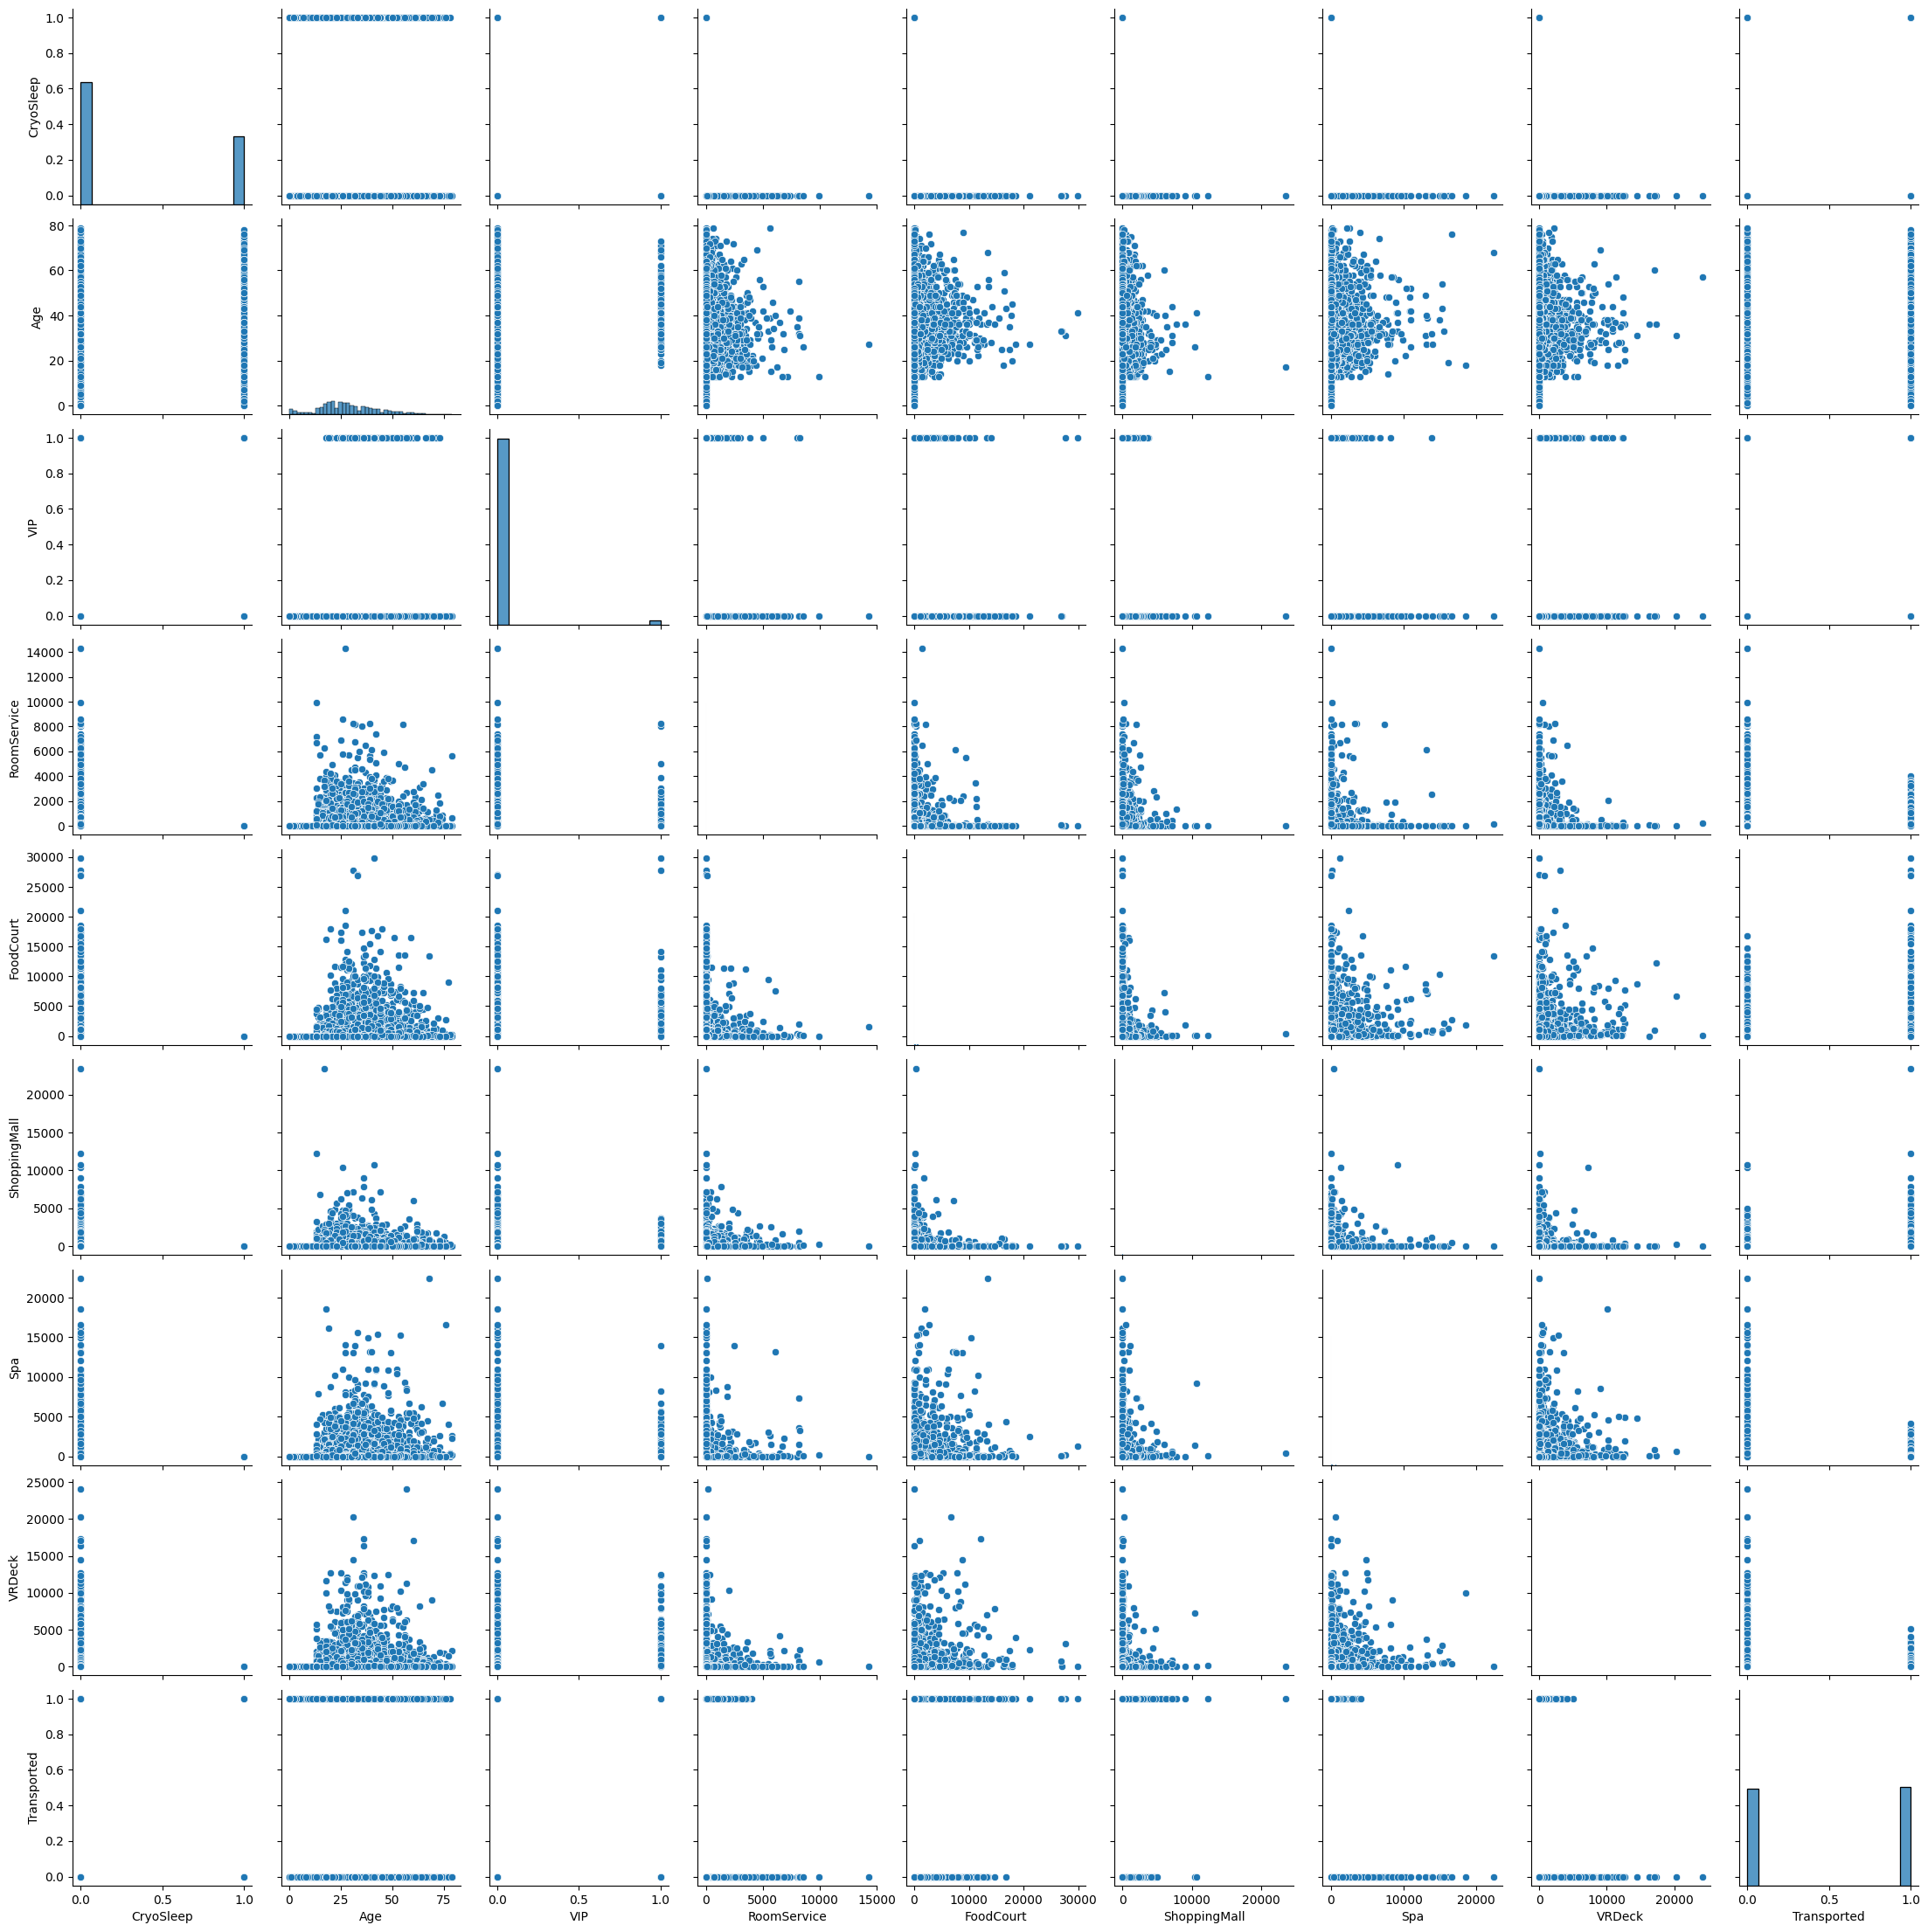

In [153]:
sns.pairplot(df)